In [27]:
import pandas as pd
import numpy as np

In [28]:
season = pd.read_csv('seasontripduration.csv')
boro = pd.read_csv('borotripduration.csv')

In [29]:
season

,bike_id,WINTER,SPRING,SUMMER,FALL
0,18009,824014.0,1698841.0,3040407.0,2307214.0
1,15187,1003407.0,2170604.0,2860792.0,1613187.0
2,22314,320889.0,542056.0,1540759.0,826791.0
3,14639,747133.0,3009909.0,2404875.0,1769485.0
4,18874,665669.0,2279624.0,2979419.0,1460566.0
...,...,...,...,...,...
32870,31873,NaN,NaN,NaN,686.0
32871,43445,438.0,NaN,NaN,NaN
32872,43890,NaN,NaN,2383.0,NaN
32873,45441,NaN,NaN,1048.0,NaN


In [30]:
boro

,bike_id,Manhattan,Brooklyn,Queens
0,18222,6386540.0,2925128.0,85293.0
1,19905,7400985.0,2317761.0,103891.0
2,25234,3474676.0,945852.0,81202.0
3,15752,4194593.0,717808.0,65046.0
4,17028,6639249.0,800332.0,72211.0
...,...,...,...,...
32870,31876,NaN,NaN,NaN
32871,47446,407.0,NaN,NaN
32872,31763,NaN,NaN,NaN
32873,46307,NaN,395.0,NaN


In [31]:
big = season.merge(boro, on = 'bike_id', how = 'inner')

In [32]:
big

,bike_id,WINTER,SPRING,SUMMER,FALL,Manhattan,Brooklyn,Queens
0,18009,824014.0,1698841.0,3040407.0,2307214.0,6971720.0,818887.0,53516.0
1,15187,1003407.0,2170604.0,2860792.0,1613187.0,6372562.0,1189126.0,62672.0
2,22314,320889.0,542056.0,1540759.0,826791.0,2621547.0,564105.0,30315.0
3,14639,747133.0,3009909.0,2404875.0,1769485.0,6761050.0,1019696.0,120842.0
4,18874,665669.0,2279624.0,2979419.0,1460566.0,6148380.0,1131430.0,81134.0
...,...,...,...,...,...,...,...,...
32870,31873,NaN,NaN,NaN,686.0,NaN,NaN,NaN
32871,43445,438.0,NaN,NaN,NaN,438.0,NaN,NaN
32872,43890,NaN,NaN,2383.0,NaN,2383.0,NaN,NaN
32873,45441,NaN,NaN,1048.0,NaN,NaN,1048.0,NaN


In [33]:
big["seasonsum"] = big[['WINTER', 'SPRING', 'SUMMER', 'FALL']].sum(axis=1)
big["borosum"] = big[['Manhattan', 'Brooklyn', 'Queens']].sum(axis = 1)
big["Bronx"] = big['seasonsum'] - big['borosum']
bronx = big.pop('Bronx')
big.insert(8, 'Bronx', bronx)
big.fillna(0)


,bike_id,WINTER,SPRING,SUMMER,FALL,Manhattan,Brooklyn,Queens,Bronx,seasonsum,borosum
0,18009,824014.0,1698841.0,3040407.0,2307214.0,6971720.0,818887.0,53516.0,26353.0,7870476.0,7844123.0
1,15187,1003407.0,2170604.0,2860792.0,1613187.0,6372562.0,1189126.0,62672.0,23630.0,7647990.0,7624360.0
2,22314,320889.0,542056.0,1540759.0,826791.0,2621547.0,564105.0,30315.0,14528.0,3230495.0,3215967.0
3,14639,747133.0,3009909.0,2404875.0,1769485.0,6761050.0,1019696.0,120842.0,29814.0,7931402.0,7901588.0
4,18874,665669.0,2279624.0,2979419.0,1460566.0,6148380.0,1131430.0,81134.0,24334.0,7385278.0,7360944.0
...,...,...,...,...,...,...,...,...,...,...,...
32870,31873,0.0,0.0,0.0,686.0,0.0,0.0,0.0,686.0,686.0,0.0
32871,43445,438.0,0.0,0.0,0.0,438.0,0.0,0.0,0.0,438.0,438.0
32872,43890,0.0,0.0,2383.0,0.0,2383.0,0.0,0.0,0.0,2383.0,2383.0
32873,45441,0.0,0.0,1048.0,0.0,0.0,1048.0,0.0,0.0,1048.0,1048.0


In [23]:
life = pd.read_csv('firstlastperbike.csv')
life['last'] = pd.to_datetime(life['last'])
life['first'] = pd.to_datetime(life['first'])

In [24]:
life.dtypes

bike_id             int64
last       datetime64[ns]
first      datetime64[ns]
dtype: object

In [38]:
life['life'] = life['last'] - life['first']
life['life'] = life['life']/np.timedelta64(1, 'Y')

# life.drop(['last', 'first'], axis = 1, inplace = True)

,bike_id,last,first,life
0,14653,2020-11-10 12:56:53.835,2014-01-09 15:02:32.000,6.836315
1,31577,2020-10-10 23:35:45.542,2017-09-26 07:47:50.000,3.040879
2,37299,2020-07-11 04:05:21.473,2019-03-21 12:29:03.094,1.307762
3,19273,2020-10-30 20:50:03.563,2013-06-04 09:56:41.000,7.407281
4,15152,2020-10-19 22:35:53.261,2013-06-04 19:59:09.000,7.376219
...,...,...,...,...
33102,29651,2017-04-11 20:57:47.000,2017-04-11 20:57:47.000,0.000000
33103,44799,2020-07-10 23:05:02.838,2020-07-10 23:05:02.838,0.000000
33104,47503,2020-09-17 13:16:44.005,2020-09-17 13:16:44.005,0.000000
33105,37959,2019-03-16 21:40:50.533,2019-03-16 21:40:50.533,0.000000


<AxesSubplot:>

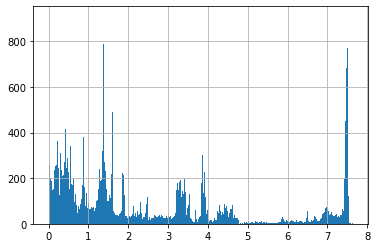

In [46]:
life['life'].hist(bins = 400)

In [50]:
sub = life.loc[life['last'] <= pd.to_datetime('2019-09-01')]

In [52]:
sub.loc[sub['life'] <= 1]

,bike_id,last,first,life
52,23626,2015-10-10 18:37:19.000,2015-09-14 12:35:05.000,0.071874
68,33924,2019-04-25 20:51:45.396,2018-08-08 07:34:59.804,0.713371
85,34786,2019-04-13 17:30:57.464,2018-10-05 14:29:35.669,0.520547
232,37676,2019-04-09 13:02:45.592,2019-02-28 17:14:37.912,0.109037
588,20157,2014-04-01 13:27:11.000,2013-06-02 13:31:15.000,0.829578
...,...,...,...,...
33100,29598,2017-10-01 21:15:06.000,2017-10-01 21:15:06.000,0.000000
33101,29637,2017-06-08 10:12:35.000,2017-06-08 10:12:35.000,0.000000
33102,29651,2017-04-11 20:57:47.000,2017-04-11 20:57:47.000,0.000000
33105,37959,2019-03-16 21:40:50.533,2019-03-16 21:40:50.533,0.000000


In [26]:
life

,bike_id,last,first,life
0,14653,2020-11-10 12:56:53.835,2014-01-09 15:02:32.000,6.836315
1,31577,2020-10-10 23:35:45.542,2017-09-26 07:47:50.000,3.040879
2,37299,2020-07-11 04:05:21.473,2019-03-21 12:29:03.094,1.307762
3,19273,2020-10-30 20:50:03.563,2013-06-04 09:56:41.000,7.407281
4,15152,2020-10-19 22:35:53.261,2013-06-04 19:59:09.000,7.376219
...,...,...,...,...
33102,29651,2017-04-11 20:57:47.000,2017-04-11 20:57:47.000,0.000000
33103,44799,2020-07-10 23:05:02.838,2020-07-10 23:05:02.838,0.000000
33104,47503,2020-09-17 13:16:44.005,2020-09-17 13:16:44.005,0.000000
33105,37959,2019-03-16 21:40:50.533,2019-03-16 21:40:50.533,0.000000


In [22]:
big = big.merge(life, on = 'bike_id', how = 'inner')
big

,bike_id,WINTER,SPRING,SUMMER,FALL,Manhattan,Brooklyn,Queens,Bronx,seasonsum,borosum,life
0,18009,824014.0,1698841.0,3040407.0,2307214.0,6971720.0,818887.0,53516.0,26353.0,7870476.0,7844123.0,6.512605
1,15187,1003407.0,2170604.0,2860792.0,1613187.0,6372562.0,1189126.0,62672.0,23630.0,7647990.0,7624360.0,7.213212
2,22314,320889.0,542056.0,1540759.0,826791.0,2621547.0,564105.0,30315.0,14528.0,3230495.0,3215967.0,1.406314
3,14639,747133.0,3009909.0,2404875.0,1769485.0,6761050.0,1019696.0,120842.0,29814.0,7931402.0,7901588.0,6.919117
4,18874,665669.0,2279624.0,2979419.0,1460566.0,6148380.0,1131430.0,81134.0,24334.0,7385278.0,7360944.0,7.455576
...,...,...,...,...,...,...,...,...,...,...,...,...
32870,31873,NaN,NaN,NaN,686.0,NaN,NaN,NaN,686.0,686.0,0.0,0.000000
32871,43445,438.0,NaN,NaN,NaN,438.0,NaN,NaN,0.0,438.0,438.0,0.000000
32872,43890,NaN,NaN,2383.0,NaN,2383.0,NaN,NaN,0.0,2383.0,2383.0,0.000000
32873,45441,NaN,NaN,1048.0,NaN,NaN,1048.0,NaN,0.0,1048.0,1048.0,0.000000
